In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df=pd.read_csv("vehicles.csv")

In [3]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [84]:
df.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [ ]:
# forward fill the odometer null values
# df['odometer'] = df['odometer'].fillna(method='ffill')

In [4]:
df.shape

(458213, 26)

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

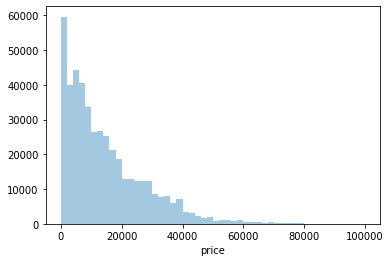

In [6]:
sns.distplot(df.price[df["price"]<100000], kde=0)

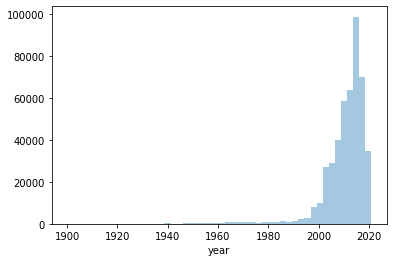

In [7]:
sns.distplot(df.year, kde=0)

In [8]:
cyl=df.cylinders.str.extract('(\d+)')
cyl.columns=['number of cylinders']
cyl

,number of cylinders
0,8
1,4
2,6
3,4
4,8
...,...
458208,6
458209,4
458210,6
458211,8


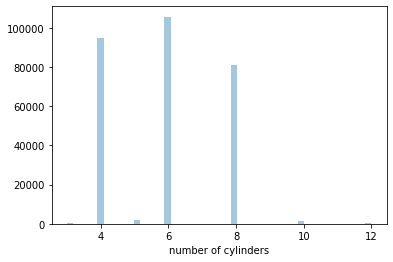

In [9]:
sns.distplot(cyl['number of cylinders'], kde=0)

In [45]:
df['transmission'].value_counts()

automatic    396322
other         32186
manual        27263
Name: transmission, dtype: int64

Text(0, 0.5, 'Count')

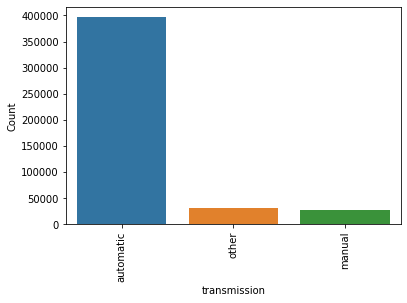

In [48]:
ax = sns.countplot(x="transmission", data=df, order=df['transmission'].value_counts().index[0:df['transmission'].nunique()])
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

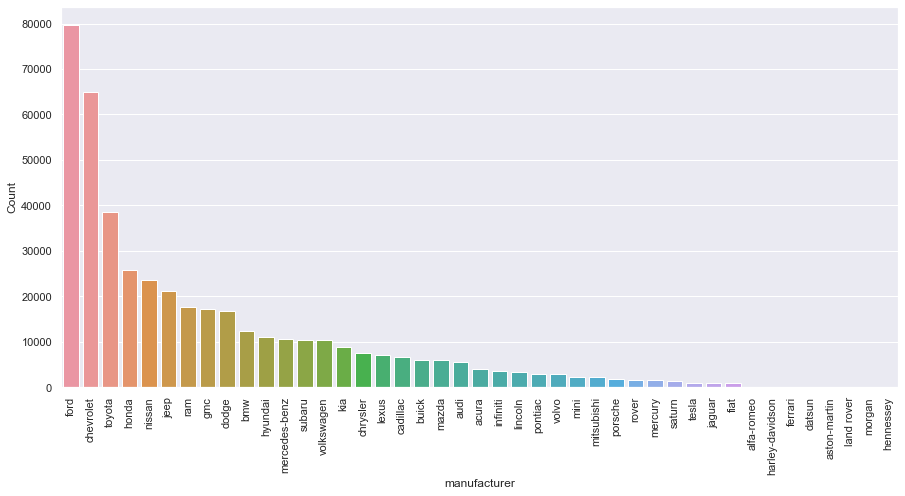

In [85]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(x="manufacturer", data=df, order=df['manufacturer'].value_counts().index[0:df['manufacturer'].nunique()])
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

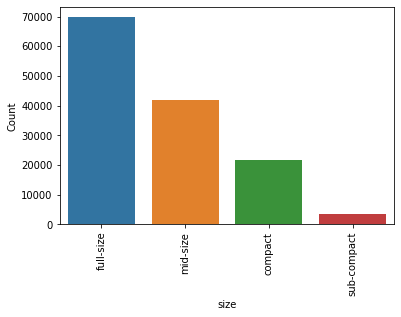

In [70]:
ax = sns.countplot(x="size", data=df, order=df['size'].value_counts().index[0:df['size'].nunique()])
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

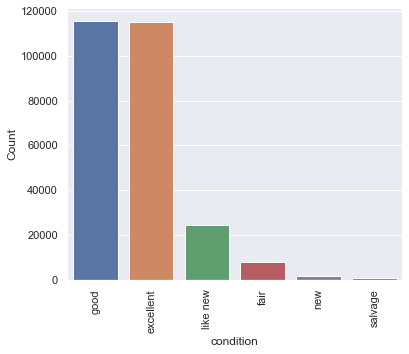

In [82]:
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x="condition", data=df, order=df['condition'].value_counts().index[0:df['condition'].nunique()])
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

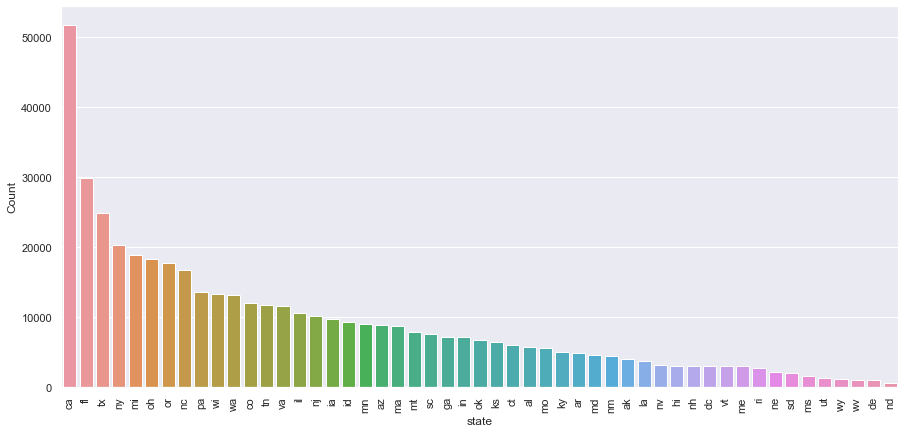

In [79]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(x='state', data=df, order=df['state'].value_counts().index[0:df['state'].nunique()])
plt.xticks(rotation=90)
plt.ylabel('Count')

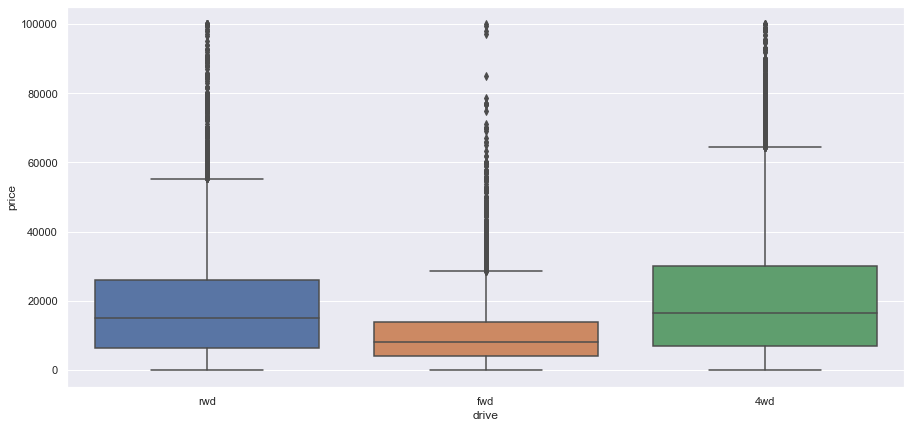

In [95]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(x="drive", y=df.price[df["price"]<100000],data=df)
plt.show()

Linear regression

In [99]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [101]:
df['odometer'] = df['odometer'].fillna(method='ffill')
df['price'] = df['price'].fillna(method='ffill')

In [126]:
df1=df.loc[(df['price']<100000) & (df['odometer']<250000)]

In [127]:
X = df1.odometer.values.reshape(-1,1)
Y = df1.price.values.reshape(-1,1)

#split our dataset using test set size = 0.25
#we want to inference about the price
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

#model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

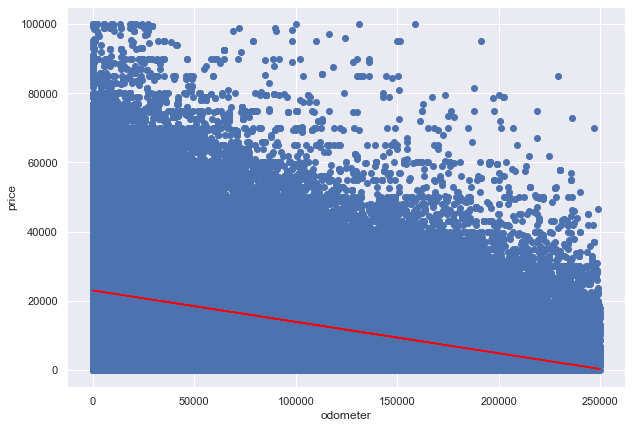

In [135]:
plt.figure(figsize=(10,7))
predict_X = lin_reg.predict(X)
plt.scatter(X,Y)
plt.plot(X,predict_X,color="red")
plt.ylabel("price")
plt.xlabel("odometer")
# plt.xlim((0,2e5))
plt.show()